# ABALONE RESEARCH

### I came across a project that someone undertook and a nice dataset to play around with:

#### ** Abalone, belonging to the family Haliotidae, are marine gastropod molluscs found in various sizes, ranging from small to very large. They are essentially marine snails. The shells of abalones exhibit a distinct low, spiral structure with several open respiratory pores arranged in a row near the outer edge. 

#### ** These shells possess a thick inner layer made of nacre, also known as mother-of-pearl, which often displays a striking iridescence in many species. This iridescence gives rise to a spectrum of vibrant, changeable colors, making abalone shells highly sought after by humans for decorative purposes, as well as for crafting jewelry.

###### The following dataset has been given wrt abalones from the University of California, Irvine.

https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [193]:
# Import all the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [194]:
html = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df1 = pd.read_csv(html)

In [195]:
df1.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [196]:
df.shape

(4177, 9)

In [197]:
# As we can see the first row of the CSV becomes the column names
df1.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [198]:
# Let's replace the column names as follows
column_names = ["Sex","Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=column_names)
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [199]:
df1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [200]:
# Check the data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [201]:
# Check if any entry is NaN value
df1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [202]:
# We can play around with getting minimum/maximum heights, weights, rings, etc.
min_weight = round(df1.Whole_weight.min(),4)
max_weight = round(df1.Whole_weight.max(),4)
weight_m = round(df1.Whole_weight.mean(),4)
print("The minimum weight is " + str(min_weight) + "\n" + 
      "The maximum weight is " + str(max_weight) + "\n" + 
      "The average weight is " + str(weight_m))

The minimum weight is 0.002
The maximum weight is 2.8255
The average weight is 0.8287


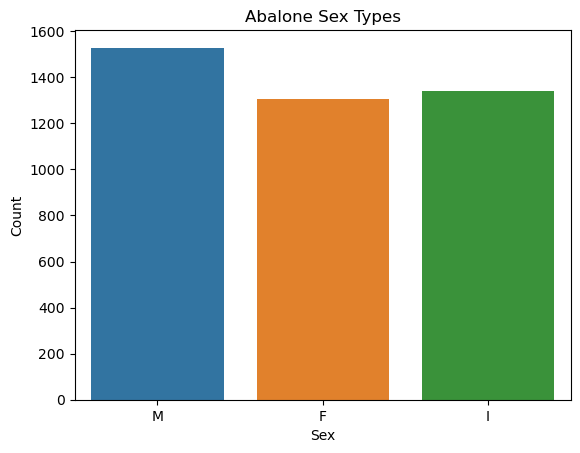

In [203]:
# There are 3 types under sex; Male, Female and Infant
# 'Sex' is the column containing the sex types (M, F, I)
# Create a count plot
sns.countplot(x='Sex', data=df1)

# Add title and labels
plt.title('Abalone Sex Types')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

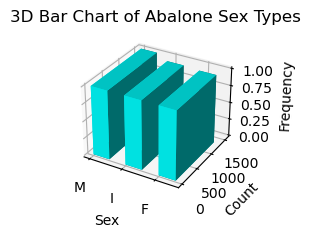

In [204]:
# Count the occurrences of each sex type
sex_counts = df1['Sex'].value_counts()

# Create a 3D bar chart
fig = plt.figure()
ax = fig.add_subplot(222, projection='3d')

x_pos = np.arange(len(sex_counts)) * 2
y_pos = np.zeros(len(sex_counts))
z_pos = np.zeros(len(sex_counts))
x_size = np.ones(len(sex_counts))
y_size = sex_counts.values # Use the count values directly
z_size = np.ones(len(sex_counts))

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')

# Set labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_zlabel('Frequency')
ax.set_title('3D Bar Chart of Abalone Sex Types')

# Set x-axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(sex_counts.index)

# Show the plot
plt.show()

In [205]:
#Sorting the order according to amount of Rings and Shell_weight
df_rings_sort = df1.sort_values(['Rings','Shell_weight'])
df_rings_sort

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
...,...,...,...,...,...,...,...,...,...
2201,F,0.645,0.490,0.215,1.4060,0.4265,0.2285,0.5100,25
294,M,0.600,0.495,0.195,1.0575,0.3840,0.1900,0.3750,26
2209,F,0.550,0.465,0.180,1.2125,0.3245,0.2050,0.5250,27
2108,M,0.665,0.535,0.225,2.1835,0.7535,0.3910,0.8850,27


In [206]:
columns_display = ['Rings','Shell_weight','Sex','Whole_weight']

# Display the sorted DataFrame with only the specified columns
df_rings_sort[columns_display]

,Rings,Shell_weight,Sex,Whole_weight
236,1,0.0015,I,0.0020
719,2,0.0050,I,0.0150
238,3,0.0030,I,0.0080
237,3,0.0040,I,0.0130
1429,3,0.0040,I,0.0140
...,...,...,...,...
2201,25,0.5100,F,1.4060
294,26,0.3750,M,1.0575
2209,27,0.5250,F,1.2125
2108,27,0.8850,M,2.1835


In [207]:
# On average check who weighs more males or females
df1.groupby('Sex').mean()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


Male MSE: 7.884857428943125
Female MSE: 8.943831091269287
Infant MSE: 3.2469625022910686


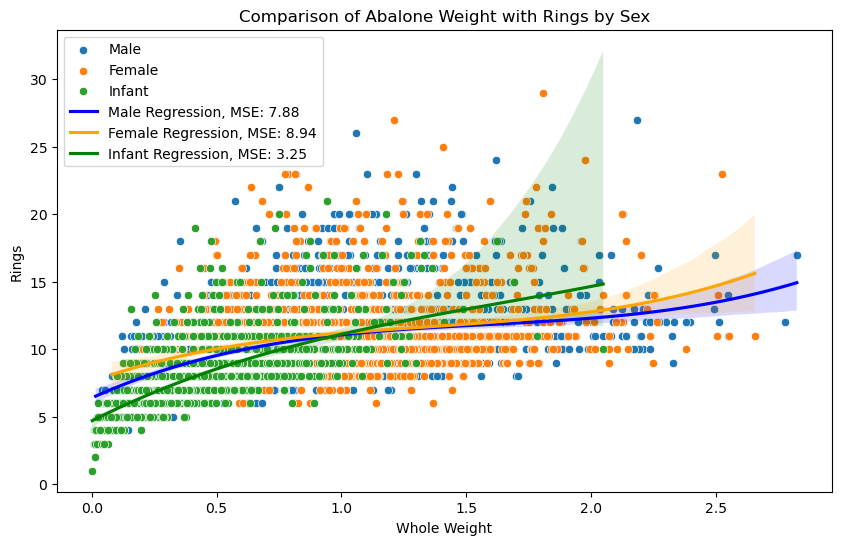

In [218]:
# Just for the sake of it, I compared the whole weight and rings of each sex to get some regression results

# Filter the DataFrame for male abalones
male_data = df1[df1['Sex'] == 'M']

# Filter the DataFrame for female abalones
female_data = df1[df1['Sex'] == 'F']

# Filter the DataFrame for infant abalones
infant_data = df1[df1['Sex'] == 'I']

# Plot scatter plots for male, female, and infant abalones
plt.figure(figsize=(10, 6))

# Scatter plot for male abalones
sns.scatterplot(data=male_data, x='Whole_weight', y='Rings', label='Male')

# Scatter plot for female abalones
sns.scatterplot(data=female_data, x='Whole_weight', y='Rings', label='Female')

# Scatter plot for infant abalones
sns.scatterplot(data=infant_data, x='Whole_weight', y='Rings', label='Infant')

# Perform linear regression for male abalones
male_lm = LinearRegression()
male_lm.fit(male_data[['Whole_weight']], male_data['Rings'])
male_predictions = male_lm.predict(male_data[['Whole_weight']])
male_mse = mean_squared_error(male_data['Rings'], male_predictions)
print("Male MSE:", male_mse)

# Perform linear regression for female abalones
female_lm = LinearRegression()
female_lm.fit(female_data[['Whole_weight']], female_data['Rings'])
female_predictions = female_lm.predict(female_data[['Whole_weight']])
female_mse = mean_squared_error(female_data['Rings'], female_predictions)
print("Female MSE:", female_mse)

# Perform linear regression for infant abalones
infant_lm = LinearRegression()
infant_lm.fit(infant_data[['Whole_weight']], infant_data['Rings'])
infant_predictions = infant_lm.predict(infant_data[['Whole_weight']])
infant_mse = mean_squared_error(infant_data['Rings'], infant_predictions)
print("Infant MSE:", infant_mse)

# Plot regression lines
x_range = np.linspace(df1['Whole_weight'].min(), df1['Whole_weight'].max(), 100)

sns.regplot(x='Whole_weight', y='Rings', data=male_data, scatter=False, color='blue', label=f'Male Regression, MSE: {male_mse:.2f}', order=3)
sns.regplot(x='Whole_weight', y='Rings', data=female_data, scatter=False, color='orange', label=f'Female Regression, MSE: {female_mse:.2f}', order=3)
sns.regplot(x='Whole_weight', y='Rings', data=infant_data, scatter=False, color='green', label=f'Infant Regression, MSE: {infant_mse:.2f}', order=3)

# Set plot labels and title
plt.xlabel('Whole Weight')
plt.ylabel('Rings')
plt.title('Comparison of Abalone Weight with Rings by Sex')

# Show legend
plt.legend()

# Show plot
plt.show()